<a href="https://colab.research.google.com/github/carlosgilrodrigo/TFM/blob/main/ClusteringSinSeleccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importación de paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Lectura de datos
df = pd.read_csv('/content/drive/MyDrive/TFM/datasetSeleccionadasPreClustering.csv', decimal='.')

In [12]:
df

,id,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso,cluster_yellow_cards,PCA_Component_Yellow_Cards_1,PCA_Component_Yellow_Cards_2,cluster_red_cards
0,0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,0.21,0.42,0.67,...,0.00,0.25,0.40,0.33,0,0,4,1.012716,0.385653,2
1,1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,0.22,0.32,0.25,...,0.27,0.07,0.74,0.49,0,0,0,-1.272415,-0.665006,0
2,2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,0.36,0.26,0.38,...,0.29,0.06,0.66,0.71,0,0,4,0.375358,2.134941,0
3,3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,0.36,0.42,0.50,...,0.00,0.75,0.43,0.00,0,2,2,-0.160485,0.446924,0
4,4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,0.68,0.21,0.46,...,0.23,0.19,0.49,0.46,1,1,5,-0.099214,-0.726277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,0.21,0.26,0.50,...,0.20,0.20,0.46,0.40,2,1,0,-1.272415,-0.665006,0
4066,4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,0.18,0.26,0.25,...,0.23,0.10,0.63,0.77,1,1,2,-0.736572,1.023011,0
4067,4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,0.34,0.21,0.17,...,0.23,0.19,0.49,0.74,1,1,0,-1.272415,-0.665006,0
4068,4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,0.64,0.11,0.54,...,0.21,0.06,0.66,0.59,0,0,0,-1.272415,-0.665006,1


#1 - Tarjetas amarillas locales y visitantes a partir del resultado del partido

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result_match            0    1    2
cluster_yellow_cards               
0                     548  242  341
1                     134  111  122
2                     340  136  150
3                     182  142  179
4                     296  184  197
5                     335  185  246


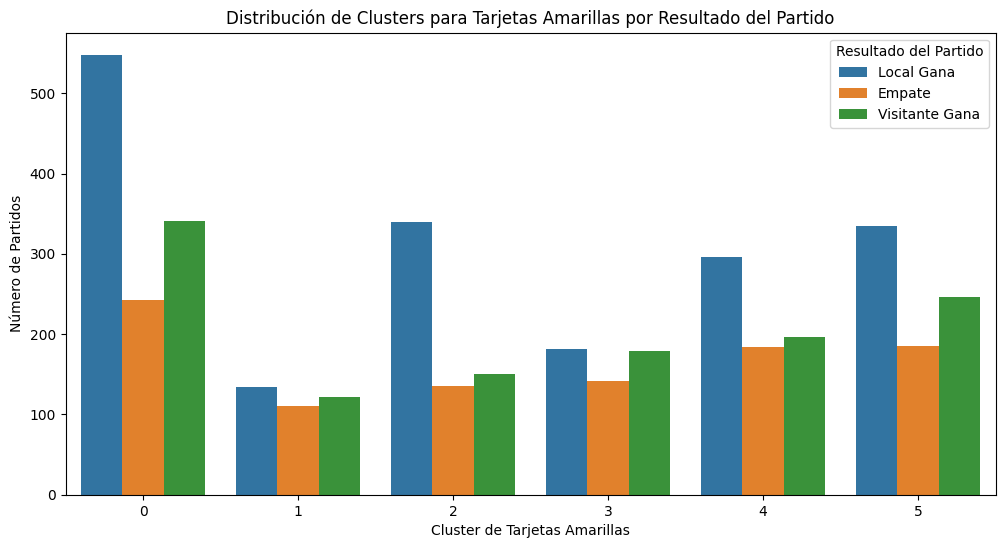

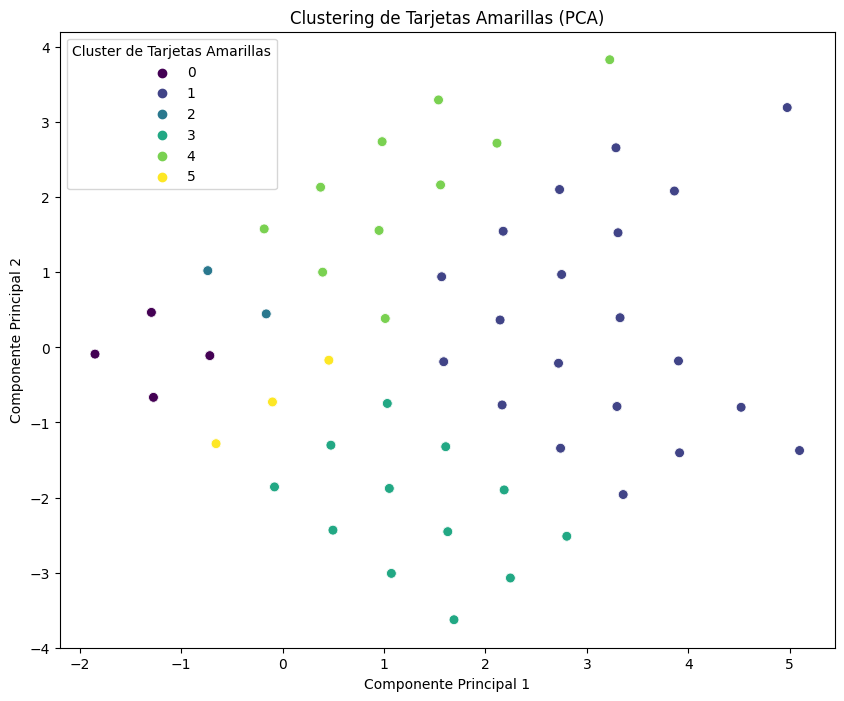

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecciona las características relevantes para el clustering de tarjetas amarillas
features_yellow_cards = ['home_yellow_cards', 'away_yellow_cards']

# Selecciona las características para el clustering
features_for_clustering_yellow_cards = df[features_yellow_cards]

# Normalización/estandarización de características
scaler_yellow_cards = StandardScaler()
features_scaled_yellow_cards = scaler_yellow_cards.fit_transform(features_for_clustering_yellow_cards)

# K-Means clustering para tarjetas amarillas de equipos locales y visitantes
kmeans_yellow_cards = KMeans(n_clusters=6, random_state=42)
df['cluster_yellow_cards'] = kmeans_yellow_cards.fit_predict(features_scaled_yellow_cards)

# Verifica la distribución de los clusters en función de los resultados de los partidos
result_distribution_yellow_cards = df.groupby(['cluster_yellow_cards', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_yellow_cards)


import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de clusters en función de los resultados de los partidos
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_yellow_cards', hue='result_match', data=df)
plt.title('Distribución de Clusters para Tarjetas Amarillas por Resultado del Partido')
plt.xlabel('Cluster de Tarjetas Amarillas')
plt.ylabel('Número de Partidos')
plt.legend(title='Resultado del Partido', loc='upper right', labels=['Local Gana', 'Empate', 'Visitante Gana'])
plt.show()

from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 componentes principales
pca_yellow_cards = PCA(n_components=2)
features_pca_yellow_cards = pca_yellow_cards.fit_transform(features_scaled_yellow_cards)

# Añadir las componentes principales al DataFrame
df['PCA_Component_Yellow_Cards_1'] = features_pca_yellow_cards[:, 0]
df['PCA_Component_Yellow_Cards_2'] = features_pca_yellow_cards[:, 1]

# Graficar dispersión con colores según el cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_Component_Yellow_Cards_1', y='PCA_Component_Yellow_Cards_2', hue='cluster_yellow_cards', data=df, palette='viridis', s=50)
plt.title('Clustering de Tarjetas Amarillas (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster de Tarjetas Amarillas')
plt.show()

#2 - Tarjetas rojas locales y visitantes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_red_cards
0    3540
1     236
2     294
dtype: int64


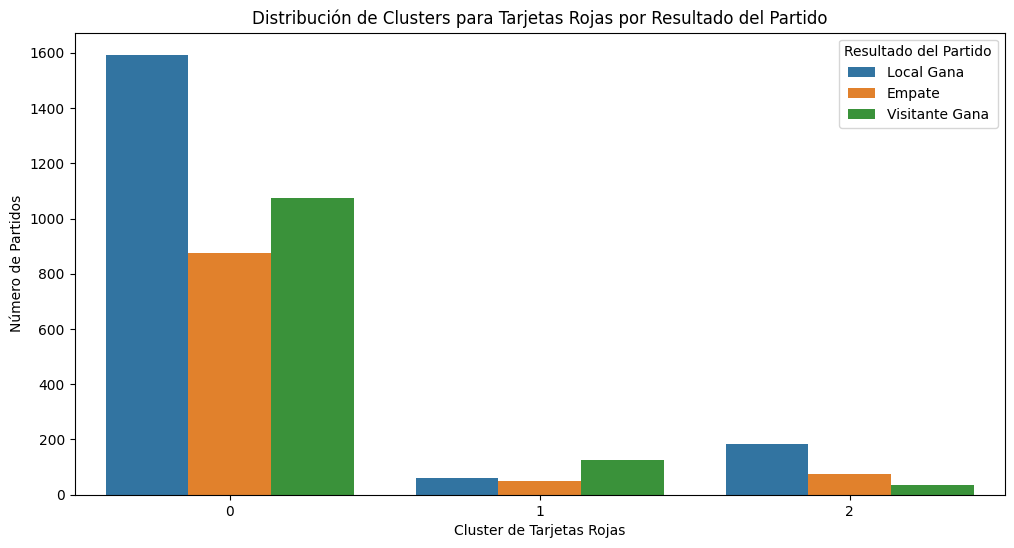

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecciona las características relevantes para el clustering de tarjetas rojas
features_red_cards = ['home_red_cards', 'away_red_cards']

# Selecciona las características para el clustering
features_for_clustering_red_cards = df[features_red_cards]

# Normalización/estandarización de características
scaler_red_cards = StandardScaler()
features_scaled_red_cards = scaler_red_cards.fit_transform(features_for_clustering_red_cards)

# K-Means clustering para tarjetas rojas de equipos locales y visitantes
kmeans_red_cards = KMeans(n_clusters=3, random_state=42)
df['cluster_red_cards'] = kmeans_red_cards.fit_predict(features_scaled_red_cards)

# Verifica la distribución de los clusters
cluster_distribution_red_cards = df.groupby('cluster_red_cards').size()
print(cluster_distribution_red_cards)

import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de clusters en función de los resultados de los partidos
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_red_cards', hue='result_match', data=df)  # Asegúrate de tener el nombre correcto del cluster para tarjetas rojas
plt.title('Distribución de Clusters para Tarjetas Rojas por Resultado del Partido')
plt.xlabel('Cluster de Tarjetas Rojas')
plt.ylabel('Número de Partidos')
plt.legend(title='Resultado del Partido', loc='upper right', labels=['Local Gana', 'Empate', 'Visitante Gana'])
plt.show()